# Шестая итерация датасета <br>
## 4 датасета, по каждому режиму транспортировки <br>

Тема работы: Моделирование тарифов (стоимости) транспортировки на килограмм/километр с учетом сезонности и локализации для разных форм транспортировки в ритейле. <br>

**Перечень переменных:** <br>
&emsp;**avia_mode_df** <br>
&emsp;&emsp;- cost - стоимость транспортировки товара;<br>
&emsp;&emsp;- distance - пройденное расстояние (в километрах);<br>
&emsp;&emsp;- delivery_time_hours - время в пути (в часах);<br>
&emsp;&emsp;- quantity - количество транспортируемых единиц товара;<br>
&emsp;&emsp;- totall_mass - общая масса груза, расчитана как произведение эталонной массы типа(не категории) товара на колличество товара (quantity)<br>
&emsp;&emsp;- segment - сегментация (B2B, B2C, VIP);<br>
&emsp;&emsp;- customer_type - тип покупателя (физ. лицо, юр. лицо);<br>
&emsp;&emsp;- category - категория товара;<br>
&emsp;&emsp;- sub_category - подкатегория товара;<br>
&emsp;&emsp;- region_x - регион отправления;<br>
&emsp;&emsp;- city_x - город отправления;<br>
&emsp;&emsp;- region_y - регион поступления;<br>
&emsp;&emsp;- city_y - город поступления;<br>
&emsp;&emsp;- post_index - почтовый индекс адреса доставки;<br>
&emsp;&emsp;- store_type - тип магазина поступления (оптовый, розничный);<br>
&emsp;&emsp;- season - сезон, в который был реализован заказ.<br>
&emsp;**truck_mode_df** <br>
&emsp;&emsp;- *АНАЛОГИЧНО avia_mode_df* <br>
&emsp;**rail_mode_df**<br>
&emsp;&emsp;- *АНАЛОГИЧНО avia_mode_df* <br>
&emsp;**sea_mode_df**<br>
&emsp;&emsp;- *АНАЛОГИЧНО avia_mode_df* <br>


In [194]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
import seaborn as sns

### Импорт датафреймов
avia_mode_df1.csv -> *avia_mode_df* <br>
truck_mode_df1.csv -> *truck_mode_df* <br>
rail_mode_df1.csv -> *rail_mode_df* <br>
sea_mode__df1.csv -> *sea_mode__df*

In [195]:
avia_mode_df = pd.read_csv('avia_mode_df1.csv')

## Авиа перевозки

In [196]:
avia_mode_df.tail(10)

,cost,distance,delivery_time_hours,quantity,segment,customer_type,category,sub_category,region_x,city_x,region_y,city_y,store_type,total_mass_kg,post_index,season
4534,996.93,754,10,7,VIP,Юридическое лицо,Одежда,Женская,Центральный,Нижний Новгород,Южный,Краснодар,Розничный,2.310,975832,Осень
4535,997.44,654,71,7,B2C,Юридическое лицо,Одежда,Унисекс,Южный,Сочи,Южный,Сочи,Розничный,2.800,341182,Осень
4536,997.68,542,68,4,B2C,Физическое лицо,Спорттовары,Тренажеры,Центральный,Нижний Новгород,Северо-Западный,Санкт-Петербург,Розничный,105.200,477378,Зима
4537,997.74,850,61,6,B2C,Физическое лицо,Бытовая техника,Малая техника,Северо-Западный,Санкт-Петербург,Южный,Сочи,Розничный,54.000,937518,Лето
4538,997.92,699,13,5,B2C,Физическое лицо,Электроника,Аксессуары,Центральный,Нижний Новгород,Южный,Сочи,Розничный,0.150,340284,Лето
4539,998.18,760,8,4,B2C,Физическое лицо,Одежда,Унисекс,Центральный,Москва,Центральный,Нижний Новгород,Розничный,1.600,685658,Зима
4540,998.29,697,2,7,B2C,Юридическое лицо,Одежда,Женская,Центральный,Москва,Дальневосточный,Владивосток,Розничный,2.100,907999,Осень
4541,998.57,559,12,1,B2C,Физическое лицо,Одежда,Мужская,Приволжский,Казань,Центральный,Москва,Оптовый,0.500,939247,Весна
4542,998.89,529,61,8,B2C,Физическое лицо,Электроника,Аксессуары,Северо-Западный,Санкт-Петербург,Центральный,Нижний Новгород,Розничный,0.104,25631,Осень
4543,999.53,548,5,9,B2C,Физическое лицо,Одежда,Унисекс,Приволжский,Казань,Северо-Западный,Санкт-Петербург,Оптовый,3.600,217712,Зима


In [197]:
#Числовые переменные из датафрейма
avia_mode_df_num = avia_mode_df[['cost', 'distance', 'delivery_time_hours', 'quantity', 'total_mass_kg']]

In [198]:
avia_mode_df_num.describe()

,cost,distance,delivery_time_hours,quantity,total_mass_kg
count,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000
mean,628.637392,502.526408,35.833187,5.501540,77.475399
std,437.298761,286.913474,20.992234,2.874512,154.874129
min,3.490000,5.000000,1.000000,1.000000,0.013000
25%,277.990000,249.750000,17.000000,3.000000,1.500000
50%,547.920000,506.000000,36.000000,5.000000,4.900000
75%,900.652500,753.000000,54.000000,8.000000,60.750000
max,1963.740000,1000.000000,72.000000,10.000000,730.000000


In [199]:
plt = mpl.pyplot

mpl.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

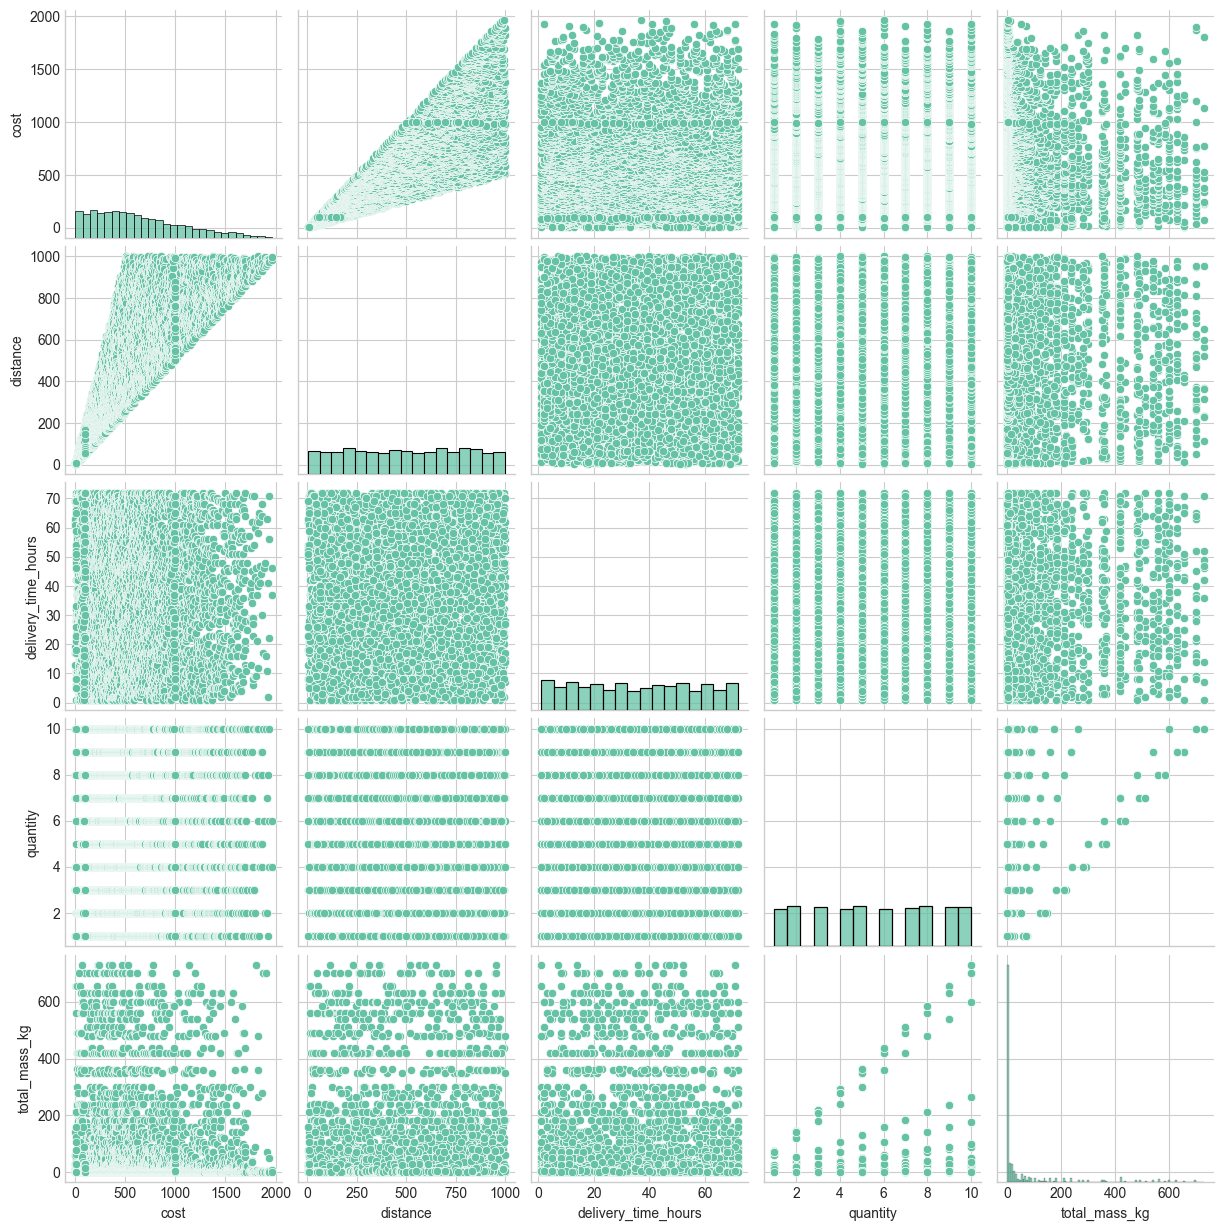

In [200]:
sns.pairplot(avia_mode_df_num)
plt.show()

### Корреляция количественных показателей

In [201]:
corr_mat = avia_mode_df_num.corr()
corr_mat.style.background_gradient(cmap='coolwarm')

,cost,distance,delivery_time_hours,quantity,total_mass_kg
cost,1.000000,0.816449,-0.003589,0.015799,-0.012014
distance,0.816449,1.000000,0.000861,0.012194,-0.010054
delivery_time_hours,-0.003589,0.000861,1.000000,-0.010038,-0.004015
quantity,0.015799,0.012194,-0.010038,1.000000,0.271325
total_mass_kg,-0.012014,-0.010054,-0.004015,0.271325,1.000000


### Чистка выбросов

In [202]:
def detect_outliner_iqr(df, columns=None): 
	if columns is None:
		columns = df.select_dtypes(include=[np.number]).columns
    
	outliers_info = {}
    
	for col in columns:
		Q1 = df[col].quantile(0.25)
		Q3 = df[col].quantile(0.75)
		IQR = Q3 - Q1
		lower_bound = Q1 - 1.5 * IQR
		upper_bound = Q3 + 1.5 * IQR
        
		outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
		outliers_info[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
		print(f"Колонка {col}: {len(outliers)} выбросов ({outliers_info[col]['percentage']:.2f}%)")
    
	return outliers_info

In [203]:
def remove_outliers_iqr(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем выбросы
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    print(f"Исходный размер: {len(df)}")
    print(f"Очищенный размер: {len(df_clean)}")
    print(f"Удалено строк: {len(df) - len(df_clean)}")
    
    return df_clean

In [204]:
num_vars = ['cost', 'distance', 'delivery_time_hours', 'quantity', 'total_mass_kg']

In [205]:
detect_outliner_iqr(avia_mode_df, num_vars)

Колонка cost: 22 выбросов (0.48%)
Колонка distance: 0 выбросов (0.00%)
Колонка delivery_time_hours: 0 выбросов (0.00%)
Колонка quantity: 0 выбросов (0.00%)
Колонка total_mass_kg: 743 выбросов (16.35%)


{'cost': {'count': 22,
  'percentage': 0.48415492957746475,
  'lower_bound': np.float64(-656.0037500000001),
  'upper_bound': np.float64(1834.6462500000002)},
 'distance': {'count': 0,
  'percentage': 0.0,
  'lower_bound': np.float64(-505.125),
  'upper_bound': np.float64(1507.875)},
 'delivery_time_hours': {'count': 0,
  'percentage': 0.0,
  'lower_bound': np.float64(-38.5),
  'upper_bound': np.float64(109.5)},
 'quantity': {'count': 0,
  'percentage': 0.0,
  'lower_bound': np.float64(-4.5),
  'upper_bound': np.float64(15.5)},
 'total_mass_kg': {'count': 743,
  'percentage': 16.351232394366196,
  'lower_bound': np.float64(-87.375),
  'upper_bound': np.float64(149.625)}}

In [206]:
avia_mode_df_clean = remove_outliers_iqr(avia_mode_df, num_vars)

Исходный размер: 4544
Очищенный размер: 3782
Удалено строк: 762


In [207]:
avia_mode_df_clean[num_vars].describe()

,cost,distance,delivery_time_hours,quantity,total_mass_kg
count,3782.000000,3782.000000,3782.000000,3782.000000,3782.000000
mean,623.944815,500.519831,35.774194,5.205711,17.560385
std,427.302979,284.657951,21.120923,2.898164,31.289236
min,3.490000,5.000000,1.000000,1.000000,0.013000
25%,277.135000,248.000000,17.000000,3.000000,1.200000
50%,550.605000,508.000000,36.000000,5.000000,3.000000
75%,898.277500,747.000000,54.000000,8.000000,17.575000
max,1830.680000,1000.000000,72.000000,10.000000,146.000000


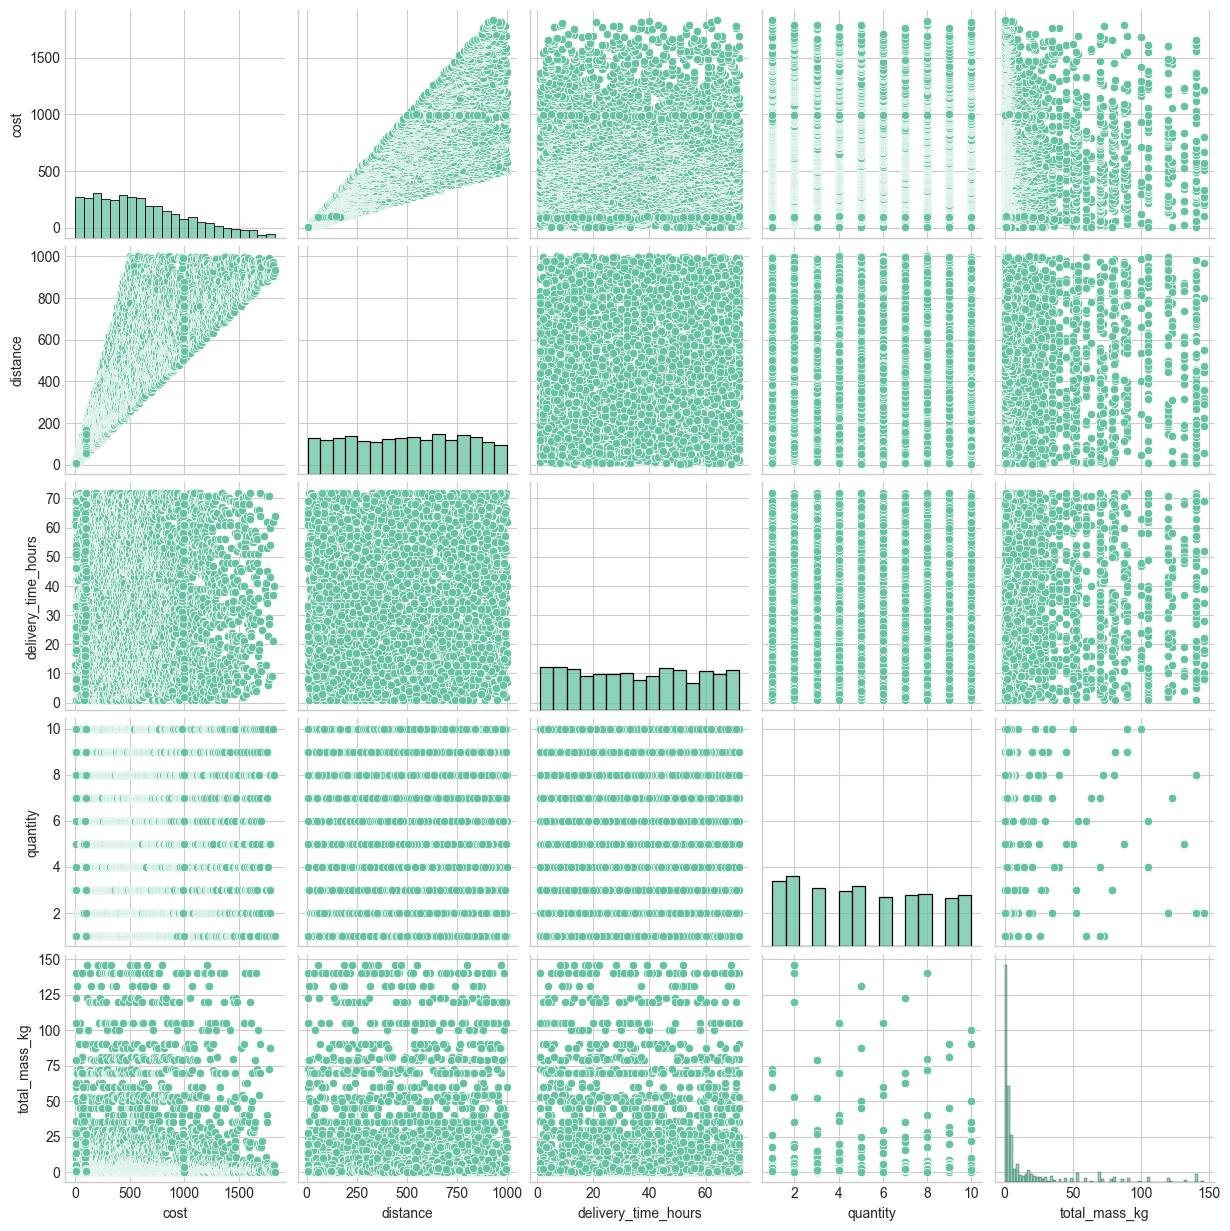

In [208]:
sns.pairplot(avia_mode_df_clean[num_vars])
plt.show()

In [209]:
corr_mat = avia_mode_df_clean[num_vars].corr()
corr_mat.style.background_gradient(cmap='coolwarm')

,cost,distance,delivery_time_hours,quantity,total_mass_kg
cost,1.000000,0.814725,-0.003454,0.024809,0.007275
distance,0.814725,1.000000,0.007202,0.023123,0.007779
delivery_time_hours,-0.003454,0.007202,1.000000,-0.009917,-0.009467
quantity,0.024809,0.023123,-0.009917,1.000000,-0.020035
total_mass_kg,0.007275,0.007779,-0.009467,-0.020035,1.000000


In [272]:
categoricatl_for_dummies = ['segment', 'customer_type', 'category', 'sub_category', 'region_x', 'city_x', 'region_y', 'city_y', 'store_type', 'season']
avia_mode_encoded_clean = pd.get_dummies(avia_mode_df_clean, columns=categoricatl_for_dummies, prefix=categoricatl_for_dummies, drop_first=True)
dummy_vars = [col for col in avia_mode_encoded_clean.columns if any(x in col for x in ['segment_', 'customer_type_', 'category_', 'sub_category_', 'season_', 'region_x_', 'city_x_', 'region_y_', 'city_y_', 'store_type_'])]

In [273]:
avia_mode_encoded_clean = avia_mode_encoded_clean.drop('post_index', axis=1)

In [274]:
corr_mat = avia_mode_encoded_clean.corr()
corr_mat.style.background_gradient(cmap='coolwarm')

,cost,distance,delivery_time_hours,quantity,total_mass_kg,segment_B2C,segment_VIP,customer_type_Юридическое лицо,category_Одежда,category_Спорттовары,category_Электроника,sub_category_Женская,sub_category_Компьютеры,sub_category_Крупная техника,sub_category_Малая техника,sub_category_Мобильные устройства,sub_category_Мужская,sub_category_Тренажеры,sub_category_Унисекс,region_x_Северо-Западный,region_x_Сибирский,region_x_Центральный,region_x_Южный,city_x_Москва,city_x_Нижний Новгород,city_x_Новосибирск,city_x_Санкт-Петербург,city_x_Сочи,region_y_Приволжский,region_y_Северо-Западный,region_y_Сибирский,region_y_Уральский,region_y_Центральный,region_y_Южный,city_y_Екатеринбург,city_y_Казань,city_y_Калининград,city_y_Краснодар,city_y_Москва,city_y_Нижний Новгород,city_y_Новосибирск,city_y_Санкт-Петербург,city_y_Сочи,store_type_Розничный,season_Зима,season_Лето,season_Осень
cost,1.000000,0.814725,-0.003454,0.024809,0.007275,0.020292,-0.004759,-0.008491,0.014931,-0.011852,-0.006071,0.008395,-0.012553,0.015515,-0.011795,-0.002776,-0.006345,-0.011852,0.020382,0.011807,-0.012672,-0.008376,0.025721,0.013663,-0.031117,-0.012672,0.011807,0.025721,0.008539,-0.013845,-0.031304,-0.008182,0.029101,-0.001949,-0.008182,0.008539,0.004264,0.005922,0.035108,0.002776,-0.031304,-0.021872,-0.008353,-0.007773,0.010243,-0.013823,-0.000875
distance,0.814725,1.000000,0.007202,0.023123,0.007779,0.013400,-0.021693,-0.016897,0.008819,-0.007499,0.005727,-0.005488,0.007404,0.018157,-0.021927,-0.010283,0.007597,-0.007499,0.011531,0.017014,-0.004949,-0.008260,0.007396,0.010905,-0.027248,-0.004949,0.017014,0.007396,-0.003557,-0.001244,-0.010342,-0.011239,0.012786,-0.001578,-0.011239,-0.003557,0.017181,0.014937,0.017106,-0.000579,-0.010342,-0.017770,-0.016668,-0.019321,-0.005033,0.002054,0.005817
delivery_time_hours,-0.003454,0.007202,1.000000,-0.009917,-0.009467,0.012843,0.002170,0.002838,0.009995,-0.014813,-0.024882,-0.012461,-0.013299,0.015798,0.018331,0.010384,0.014720,-0.014813,0.013458,0.015941,-0.006371,0.004543,-0.022715,0.009297,-0.005486,-0.006371,0.015941,-0.022715,0.024728,-0.018176,-0.015383,-0.004932,0.008747,0.011977,-0.004932,0.024728,-0.003040,0.013071,0.001198,0.010843,-0.015383,-0.020586,0.003026,-0.003436,-0.006725,0.006068,-0.005524
quantity,0.024809,0.023123,-0.009917,1.000000,-0.020035,0.011203,0.011101,0.027730,0.072149,-0.169056,0.081558,0.039908,0.031771,-0.220644,-0.012177,0.013195,0.019034,-0.169056,0.047692,-0.047315,-0.021107,0.030963,-0.001646,0.013183,0.029778,-0.021107,-0.047315,-0.001646,-0.006620,0.004933,0.009279,-0.007643,0.031842,-0.009761,-0.007643,-0.006620,-0.014516,0.010095,0.017442,0.025479,0.009279,0.020020,-0.022728,-0.029343,0.008668,0.000759,0.029175
total_mass_kg,0.007275,0.007779,-0.009467,-0.020035,1.000000,-0.002540,-0.004121,0.011435,-0.367286,0.405929,-0.160542,-0.191882,0.125450,0.485809,0.240151,-0.160176,-0.175051,0.405929,-0.173938,-0.013307,0.003750,-0.020441,0.012346,-0.011646,-0.015719,0.003750,-0.013307,0.012346,0.039556,-0.030730,0.013684,-0.002330,-0.020050,-0.005126,-0.002330,0.039556,-0.023624,-0.008009,-0.012802,-0.014097,0.013684,-0.017414,0.001063,0.006717,0.013103,0.030890,-0.028745
segment_B2C,0.020292,0.013400,0.012843,0.011203,-0.002540,1.000000,-0.504069,0.027553,-0.005821,-0.006922,0.033994,-0.005905,0.035426,-0.005894,-0.028510,0.020379,-0.006455,-0.006922,0.004143,0.025632,-0.016614,0.004371,0.016193,-0.004489,0.012703,-0.016614,0.025632,0.016193,0.023565,-0.009070,-0.013323,0.017524,0.004134,0.005814,0.017524,0.023565,0.004067,0.003266,-0.007713,0.013984,-0.013323,-0.015526,0.004476,0.017272,0.004196,0.002444,-0.009048
segment_VIP,-0.004759,-0.021693,0.002170,0.011101,-0.004121,-0.504069,1.000000,-0.016121,-0.014700,-0.002444,0.010387,-0.004367,0.005299,-0.018257,0.014164,0.004657,-0.021662,-0.002444,0.004659,-0.023201,0.015409,0.012951,-0.022240,0.017799,-0.003988,0.015409,-0.023201,-0.022240,-0.004537,-0.019598,-0.003073,0.012117,0.027392,-0.031289,0.012117,-0.004537,-0.030390,-0.001202

In [275]:
for col in avia_mode_encoded_clean.columns:
	if any(x in col for x in ['region_x_', 'region_y_', 'category_']):
		avia_mode_encoded_clean = avia_mode_encoded_clean.drop(col, axis=1)

In [276]:
corr_mat = avia_mode_encoded_clean.corr()
corr_mat.style.background_gradient(cmap='coolwarm')

,cost,distance,delivery_time_hours,quantity,total_mass_kg,segment_B2C,segment_VIP,customer_type_Юридическое лицо,city_x_Москва,city_x_Нижний Новгород,city_x_Новосибирск,city_x_Санкт-Петербург,city_x_Сочи,city_y_Екатеринбург,city_y_Казань,city_y_Калининград,city_y_Краснодар,city_y_Москва,city_y_Нижний Новгород,city_y_Новосибирск,city_y_Санкт-Петербург,city_y_Сочи,store_type_Розничный,season_Зима,season_Лето,season_Осень
cost,1.000000,0.814725,-0.003454,0.024809,0.007275,0.020292,-0.004759,-0.008491,0.013663,-0.031117,-0.012672,0.011807,0.025721,-0.008182,0.008539,0.004264,0.005922,0.035108,0.002776,-0.031304,-0.021872,-0.008353,-0.007773,0.010243,-0.013823,-0.000875
distance,0.814725,1.000000,0.007202,0.023123,0.007779,0.013400,-0.021693,-0.016897,0.010905,-0.027248,-0.004949,0.017014,0.007396,-0.011239,-0.003557,0.017181,0.014937,0.017106,-0.000579,-0.010342,-0.017770,-0.016668,-0.019321,-0.005033,0.002054,0.005817
delivery_time_hours,-0.003454,0.007202,1.000000,-0.009917,-0.009467,0.012843,0.002170,0.002838,0.009297,-0.005486,-0.006371,0.015941,-0.022715,-0.004932,0.024728,-0.003040,0.013071,0.001198,0.010843,-0.015383,-0.020586,0.003026,-0.003436,-0.006725,0.006068,-0.005524
quantity,0.024809,0.023123,-0.009917,1.000000,-0.020035,0.011203,0.011101,0.027730,0.013183,0.029778,-0.021107,-0.047315,-0.001646,-0.007643,-0.006620,-0.014516,0.010095,0.017442,0.025479,0.009279,0.020020,-0.022728,-0.029343,0.008668,0.000759,0.029175
total_mass_kg,0.007275,0.007779,-0.009467,-0.020035,1.000000,-0.002540,-0.004121,0.011435,-0.011646,-0.015719,0.003750,-0.013307,0.012346,-0.002330,0.039556,-0.023624,-0.008009,-0.012802,-0.014097,0.013684,-0.017414,0.001063,0.006717,0.013103,0.030890,-0.028745
segment_B2C,0.020292,0.013400,0.012843,0.011203,-0.002540,1.000000,-0.504069,0.027553,-0.004489,0.012703,-0.016614,0.025632,0.016193,0.017524,0.023565,0.004067,0.003266,-0.007713,0.013984,-0.013323,-0.015526,0.004476,0.017272,0.004196,0.002444,-0.009048
segment_VIP,-0.004759,-0.021693,0.002170,0.011101,-0.004121,-0.504069,1.000000,-0.016121,0.017799,-0.003988,0.015409,-0.023201,-0.022240,0.012117,-0.004537,-0.030390,-0.001202,0.023931,0.012367,-0.003073,0.003310,-0.040077,-0.001821,-0.014389,0.008716,0.019543
customer_type_Юридическое лицо,-0.008491,-0.016897,0.002838,0.027730,0.011435,0.027553,-0.016121,1.000000,-0.004543,-0.012861,-0.022438,0.022875,0.007943,-0.023531,0.022423,0.018778,0.016466,-0.023227,-0.012516,0.003659,-0.000185,-0.010208,0.007634,-0.010452,0.007571,0.001829
city_x_Москва,0.013663,0.010905,0.009297,0.013183,-0.011646,-0.004489,0.017799,-0.004543,1.000000,-0.166484,-0.168200,-0.164263,-0.259328,0.004820,0.000308,-0.005449,0.003457,0.034354,-0.003335,-0.001022,-0.001029,-0.022822,0.241935,0.002395,-0.008258,-0.011712
city_x_Нижний Новгород,-0.031117,-0.027248,-0.005486,0.029778,-0.015719,0.012703,-0.003988,-0.012861,-0.166484,1.000000,-0.111531,-0.108920,-0.171956,0.002733,0.010076,-0.002627,0.001832,-0.006651,-0.012218,0.001816,0.029761,-0.004015,0.160423,-0.002791,0.032670,-0.019410


### Преобразование качественных признаков методом "One-Hot encoding" и построение регрессионной модели 

In [214]:
categoricatl_for_dummies = ['segment', 'customer_type', 'category', 'sub_category', 'region_x', 'city_x', 'region_y', 'city_y', 'store_type', 'season']
avia_mode_encoded = pd.get_dummies(avia_mode_df, columns=categoricatl_for_dummies, prefix=categoricatl_for_dummies, drop_first=True)
numeric_vars = ['distance', 'delivery_time_hours', 'quantity', 'total_mass_kg']
dummy_vars = [col for col in avia_mode_encoded.columns if any(x in col for x in ['segment_', 'customer_type_', 'category_', 'season_', 'region_x_', 'city_x_', 'region_y_', 'city_y_', 'store_type_'])]


In [215]:
for col in avia_mode_encoded.columns:
	if any(x in col for x in ['region_x_', 'region_y_', 'total_mass', 'category_']):
		avia_mode_encoded = avia_mode_encoded.drop(col, axis=1)

In [216]:
avia_mode_encoded.to_excel('avia_mode_encoded.xlsx')

In [217]:
X = avia_mode_encoded[[col for col in avia_mode_encoded.drop('cost', axis=1).columns]].astype(float)
X = X.drop('post_index', axis = 1)
y = avia_mode_encoded['cost'].astype(float)
X = sm.add_constant(X)

In [218]:
model = sm.OLS(y, X).fit()

In [219]:
print("\n" + "="*80)
print("РЕЗУЛЬТАТЫ ЭКОНОМЕТРИЧЕСКОЙ МОДЕЛИ")
print("="*80)
print(model.summary())


РЕЗУЛЬТАТЫ ЭКОНОМЕТРИЧЕСКОЙ МОДЕЛИ
                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     381.1
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31563.
No. Observations:                4544   AIC:                         6.318e+04
Df Residuals:                    4519   BIC:                         6.334e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [220]:
X=X.drop('store_type_Розничный', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

pval = model_2.pvalues

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     397.7
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31563.
No. Observations:                4544   AIC:                         6.317e+04
Df Residuals:                    4520   BIC:                         6.333e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [221]:
X=X.drop('city_x_Нижний Новгород', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     415.9
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31563.
No. Observations:                4544   AIC:                         6.317e+04
Df Residuals:                    4521   BIC:                         6.332e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [222]:
X=X.drop('city_y_Нижний Новгород', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     435.8
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31563.
No. Observations:                4544   AIC:                         6.317e+04
Df Residuals:                    4522   BIC:                         6.331e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [223]:
X=X.drop('city_y_Сочи', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     457.7
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31563.
No. Observations:                4544   AIC:                         6.317e+04
Df Residuals:                    4523   BIC:                         6.330e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [224]:
X=X.drop('city_y_Екатеринбург', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     481.9
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31564.
No. Observations:                4544   AIC:                         6.317e+04
Df Residuals:                    4524   BIC:                         6.330e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [225]:
X=X.drop('city_x_Новосибирск', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     508.7
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31564.
No. Observations:                4544   AIC:                         6.317e+04
Df Residuals:                    4525   BIC:                         6.329e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [226]:
X=X.drop('city_x_Санкт-Петербург', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     538.8
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31564.
No. Observations:                4544   AIC:                         6.316e+04
Df Residuals:                    4526   BIC:                         6.328e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [227]:
X=X.drop('delivery_time_hours', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     572.5
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31564.
No. Observations:                4544   AIC:                         6.316e+04
Df Residuals:                    4527   BIC:                         6.327e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [228]:
X=X.drop('city_y_Казань', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     610.7
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31564.
No. Observations:                4544   AIC:                         6.316e+04
Df Residuals:                    4528   BIC:                         6.326e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [229]:
X=X.drop('quantity', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     654.4
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31564.
No. Observations:                4544   AIC:                         6.316e+04
Df Residuals:                    4529   BIC:                         6.325e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [230]:
X=X.drop('season_Зима', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     704.8
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31564.
No. Observations:                4544   AIC:                         6.316e+04
Df Residuals:                    4530   BIC:                         6.325e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [231]:
X=X.drop('customer_type_Юридическое лицо', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     763.6
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31565.
No. Observations:                4544   AIC:                         6.316e+04
Df Residuals:                    4531   BIC:                         6.324e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -11

In [232]:
X=X.drop('city_x_Москва', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     832.9
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31565.
No. Observations:                4544   AIC:                         6.315e+04
Df Residuals:                    4532   BIC:                         6.323e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8

In [233]:
X=X.drop('const', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              3406.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -31565.
No. Observations:                4544   AIC:                                  6.315e+04
Df Residuals:                    4533   BIC:                                  6.322e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [234]:
X=X.drop('city_y_Москва', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              3747.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -31566.
No. Observations:                4544   AIC:                                  6.315e+04
Df Residuals:                    4534   BIC:                                  6.322e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [235]:
X=X.drop('city_y_Санкт-Петербург', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              4162.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -31567.
No. Observations:                4544   AIC:                                  6.315e+04
Df Residuals:                    4535   BIC:                                  6.321e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [236]:
X=X.drop('city_y_Краснодар', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              4682.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -31568.
No. Observations:                4544   AIC:                                  6.315e+04
Df Residuals:                    4536   BIC:                                  6.320e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [237]:
X=X.drop('city_y_Калининград', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              5349.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -31569.
No. Observations:                4544   AIC:                                  6.315e+04
Df Residuals:                    4537   BIC:                                  6.320e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [238]:
X=X.drop('season_Осень', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              6236.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -31570.
No. Observations:                4544   AIC:                                  6.315e+04
Df Residuals:                    4538   BIC:                                  6.319e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [239]:
X=X.drop('season_Лето', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              7481.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -31572.
No. Observations:                4544   AIC:                                  6.315e+04
Df Residuals:                    4539   BIC:                                  6.319e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [240]:
X=X.drop('segment_B2C', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              9348.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -31573.
No. Observations:                4544   AIC:                                  6.315e+04
Df Residuals:                    4540   BIC:                                  6.318e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [241]:
X=X.drop('segment_VIP', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.246e+04
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -31575.
No. Observations:                4544   AIC:                                  6.316e+04
Df Residuals:                    4541   BIC:                                  6.317e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [242]:
X=X.drop('city_y_Новосибирск', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                          1.866e+04
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -31577.
No. Observations:                4544   AIC:                                  6.316e+04
Df Residuals:                    4542   BIC:                                  6.317e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [243]:
X=X.drop('city_x_Сочи', axis = 1)

model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                          3.725e+04
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -31582.
No. Observations:                4544   AIC:                                  6.317e+04
Df Residuals:                    4543   BIC:                                  6.317e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [244]:
X = sm.add_constant(X)
model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     9081.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -31582.
No. Observations:                4544   AIC:                         6.317e+04
Df Residuals:                    4542   BIC:                         6.318e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2984      7.556      0.437      0.6

### Модели по очищенным данным

In [245]:
X = avia_mode_encoded_clean.drop(['cost'], axis=1).astype(float)
X = sm.add_constant(X)
y = avia_mode_encoded_clean['cost'].astype(float)

model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     300.4
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -26198.
No. Observations:                3782   AIC:                         5.245e+04
Df Residuals:                    3756   BIC:                         5.261e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [246]:
X = X.drop('store_type_Розничный', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     313.0
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -26198.
No. Observations:                3782   AIC:                         5.245e+04
Df Residuals:                    3757   BIC:                         5.260e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [247]:
X = X.drop('total_mass_kg', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     326.7
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -26198.
No. Observations:                3782   AIC:                         5.244e+04
Df Residuals:                    3758   BIC:                         5.259e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [248]:
X = X.drop('city_y_Сочи', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     341.6
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -26198.
No. Observations:                3782   AIC:                         5.244e+04
Df Residuals:                    3759   BIC:                         5.259e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [249]:
X = X.drop('city_x_Санкт-Петербург', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     357.9
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -26198.
No. Observations:                3782   AIC:                         5.244e+04
Df Residuals:                    3760   BIC:                         5.258e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [250]:
X = X.drop('const', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              1504.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -26198.
No. Observations:                3782   AIC:                                  5.244e+04
Df Residuals:                    3761   BIC:                                  5.257e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [251]:
X = X.drop('city_y_Нижний Новгород', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              1579.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -26198.
No. Observations:                3782   AIC:                                  5.244e+04
Df Residuals:                    3762   BIC:                                  5.256e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [252]:
X = X.drop('city_x_Нижний Новгород', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              1663.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -26199.
No. Observations:                3782   AIC:                                  5.244e+04
Df Residuals:                    3763   BIC:                                  5.255e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [253]:
X = X.drop('city_x_Новосибирск', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              1755.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -26199.
No. Observations:                3782   AIC:                                  5.243e+04
Df Residuals:                    3764   BIC:                                  5.255e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [254]:
X = X.drop('city_y_Екатеринбург', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              1859.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:08   Log-Likelihood:                         -26199.
No. Observations:                3782   AIC:                                  5.243e+04
Df Residuals:                    3765   BIC:                                  5.254e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [255]:
X = X.drop('season_Зима', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              1976.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26199.
No. Observations:                3782   AIC:                                  5.243e+04
Df Residuals:                    3766   BIC:                                  5.253e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [256]:
X = X.drop('customer_type_Юридическое лицо', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              2108.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26199.
No. Observations:                3782   AIC:                                  5.243e+04
Df Residuals:                    3767   BIC:                                  5.252e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [257]:
X = X.drop('city_y_Казань', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              2258.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26199.
No. Observations:                3782   AIC:                                  5.243e+04
Df Residuals:                    3768   BIC:                                  5.251e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [258]:
X = X.drop('city_y_Санкт-Петербург', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              2432.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26200.
No. Observations:                3782   AIC:                                  5.243e+04
Df Residuals:                    3769   BIC:                                  5.251e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [259]:
X = X.drop('city_y_Краснодар', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              2635.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26200.
No. Observations:                3782   AIC:                                  5.242e+04
Df Residuals:                    3770   BIC:                                  5.250e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [260]:
X = X.drop('city_x_Москва', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              2874.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26201.
No. Observations:                3782   AIC:                                  5.242e+04
Df Residuals:                    3771   BIC:                                  5.249e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [261]:
X = X.drop('city_y_Калининград', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              3162.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26201.
No. Observations:                3782   AIC:                                  5.242e+04
Df Residuals:                    3772   BIC:                                  5.248e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [262]:
X = X.drop('quantity', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              3513.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26201.
No. Observations:                3782   AIC:                                  5.242e+04
Df Residuals:                    3773   BIC:                                  5.248e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

---

In [263]:
X = X.drop('delivery_time_hours', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              3953.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26202.
No. Observations:                3782   AIC:                                  5.242e+04
Df Residuals:                    3774   BIC:                                  5.247e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Хорошая модель на уровне 16%. Но много отрицательных переменных и полохой cond. no.

---

In [264]:
X = X.drop('season_Осень', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              4516.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26203.
No. Observations:                3782   AIC:                                  5.242e+04
Df Residuals:                    3775   BIC:                                  5.246e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [265]:
X = X.drop('season_Лето', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              5264.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26205.
No. Observations:                3782   AIC:                                  5.242e+04
Df Residuals:                    3776   BIC:                                  5.246e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

---

In [266]:
X = X.drop('city_y_Москва', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              6313.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26206.
No. Observations:                3782   AIC:                                  5.242e+04
Df Residuals:                    3777   BIC:                                  5.245e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Хорошая модель на уровне 3,7%. Но плохой cond. no.

---

In [267]:
X = X.drop('city_y_Новосибирск', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              7878.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26210.
No. Observations:                3782   AIC:                                  5.243e+04
Df Residuals:                    3778   BIC:                                  5.245e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [268]:
X = X.drop('segment_B2C', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.050e+04
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26211.
No. Observations:                3782   AIC:                                  5.243e+04
Df Residuals:                    3779   BIC:                                  5.245e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [269]:
X = X.drop('segment_VIP', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.574e+04
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26212.
No. Observations:                3782   AIC:                                  5.243e+04
Df Residuals:                    3780   BIC:                                  5.244e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [270]:
X = X.drop('city_x_Сочи', axis=1)
model_clear = sm.OLS(y,X).fit()
print(model_clear.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          3.143e+04
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:36:09   Log-Likelihood:                         -26215.
No. Observations:                3782   AIC:                                  5.243e+04
Df Residuals:                    3781   BIC:                                  5.244e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------